In [16]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Plot the accuracy vs the number of observations for our RNN.

In [2]:
survey = 'Gaia'



In [7]:
# Load the results for fold 1.
pred = pd.read_csv('../04_Compute_Metrics/'+survey+'/Results/Fold_1_Results.dat')
pred.index.name = 'ID'
pred.head()

,Prob_RRAB,Prob_T2CEP,Prob_RRC,Prob_MIRA_SR,Prob_DSCT_SXPHE,Prob_CEP,Class,Pred
ID,,,,,,,,
5321974451288430720,0.491417,0.014111,0.116118,0.222808,0.114212,0.041334,RRAB,RRAB
5976629653092222976,0.075034,0.021037,0.039975,0.796727,0.051885,0.015343,MIRA_SR,MIRA_SR
4661507054949806976,0.042722,0.167156,0.032761,0.709285,0.030921,0.017155,MIRA_SR,MIRA_SR
4660432351049502080,0.535139,0.061343,0.041015,0.217325,0.036545,0.108633,CEP,RRAB
1826671821739956736,0.080297,0.012203,0.041202,0.771117,0.078912,0.016269,MIRA_SR,MIRA_SR


In [8]:
# Load the metadata, to get the length.
path = './../../../../../Prepare_dataset/Gaia/V5/Dataset_Gaia_Phys_V5.dat'
metadata = pd.read_csv(path)
metadata.set_index('ID', inplace=True)
metadata.head()

,Path,N,N_b,N_r,Class,T_eff,e_T_eff,E_T_eff,Lum,e_Lum,...,E_Rad,logg,e_logg,E_logg,Mass,e_Mass,E_Mass,rho,e_rho,E_rho
ID,,,,,,,,,,,,,,,,,,,,,
3985923473972534400,/home/Data/Databases/GAIA/Consolidate_Gaia/dat...,8,4,4,DSCT_SXPHE,-1.0000,-1.000,-1.0000,-1.00000,-1.0,...,-1.0,-1.0000,-1.0,-1.0,-1.00,-1.0,-1.0,-1.0000,-1.0,-1.0
3986570197263160320,/home/Data/Databases/GAIA/Consolidate_Gaia/dat...,10,5,5,RRAB,6481.0000,-1.000,-1.0000,-1.00000,-1.0,...,-1.0,-1.0000,-1.0,-1.0,-1.00,-1.0,-1.0,-1.0000,-1.0,-1.0
3986754189367115264,/home/Data/Databases/GAIA/Consolidate_Gaia/dat...,12,6,6,RRAB,7381.3335,7173.793,7558.6665,2.83599,-1.0,...,-1.0,4.5185,-1.0,-1.0,1.55,-1.0,-1.0,1.0603,-1.0,-1.0
3987237630885709312,/home/Data/Databases/GAIA/Consolidate_Gaia/dat...,12,7,5,RRAB,7011.0000,-1.000,-1.0000,-1.00000,-1.0,...,-1.0,-1.0000,-1.0,-1.0,-1.00,-1.0,-1.0,-1.0000,-1.0,-1.0
3987697089307190016,/home/Data/Databases/GAIA/Consolidate_Gaia/dat...,8,4,4,RRAB,7191.5000,6808.000,8884.0000,2.30248,-1.0,...,-1.0,4.6352,-1.0,-1.0,1.58,-1.0,-1.0,1.5719,-1.0,-1.0


In [13]:
df = pd.merge(pred[['Class', 'Pred']], metadata[['N', 'N_b', 'N_r']], on='ID', how='inner')

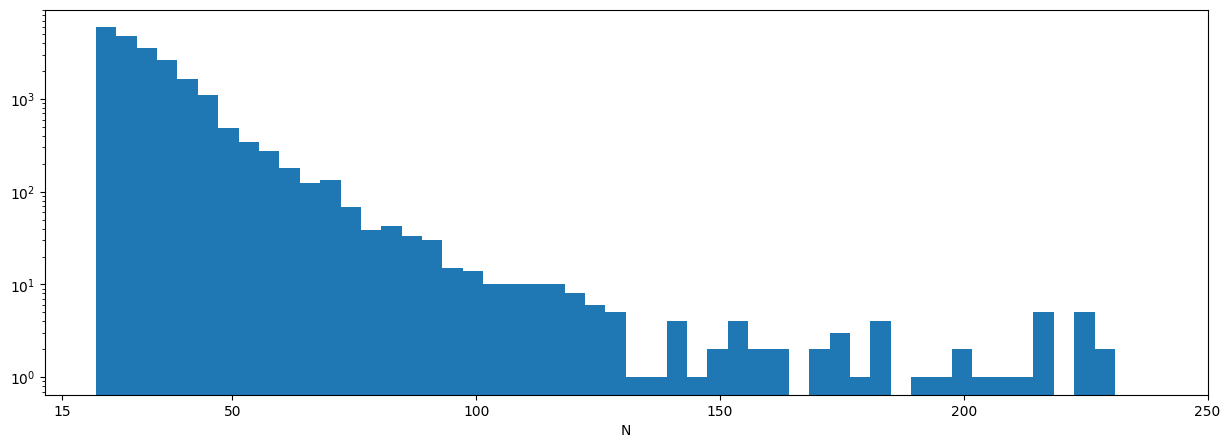

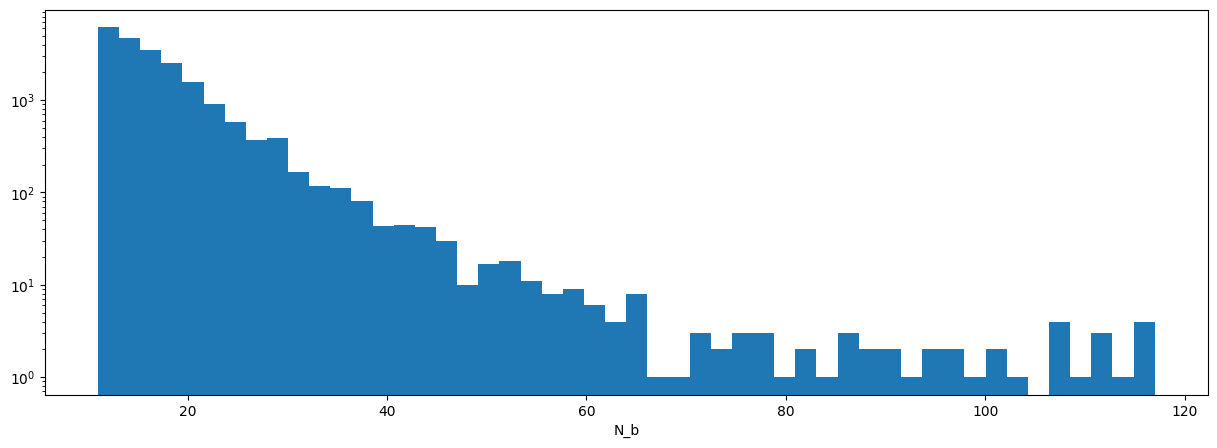

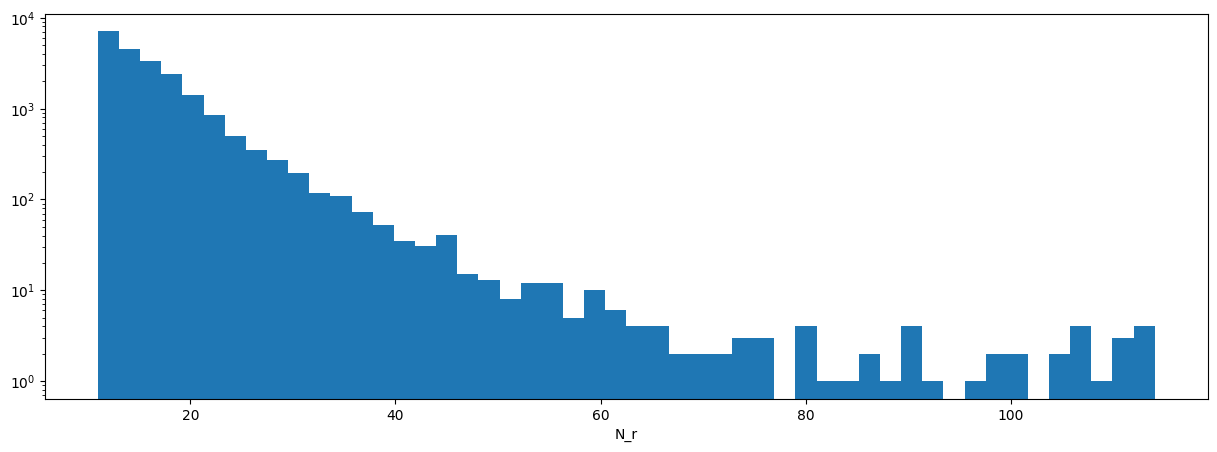

In [29]:
plt.figure(figsize=(15,5))
col = 'N'
plt.hist(df[col], log=True, bins=50)
plt.xticks([15,50,100,150,200,250])
plt.xlabel(col)
plt.show()

plt.figure(figsize=(15,5))
col = 'N_b'
plt.hist(df[col], log=True, bins=50)
# plt.xticks([15,50,100,150,200,250])
plt.xlabel(col)
plt.show()

plt.figure(figsize=(15,5))
col = 'N_r'
plt.hist(df[col], log=True, bins=50)
# plt.xticks([15,50,100,150,200,250])
plt.xlabel(col)
plt.show()

In [25]:
# plot the percentage of correctly classified objects, as a function of the number of observations.

22

In [60]:
# Set the interval each 10 
interval = 10
N_max = np.ceil(df.N.max()/interval)
XX = np.arange(25, N_max*interval, interval)

[]

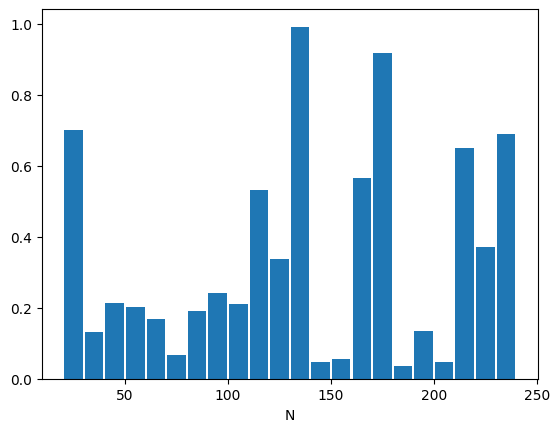

In [61]:
plt.bar(XX, np.random.rand(XX.shape[0]), width=interval-1)
plt.xlabel('N')
plt.plot()

In [62]:
XX

array([ 25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105., 115., 125.,
       135., 145., 155., 165., 175., 185., 195., 205., 215., 225., 235.])

In [73]:
ACC = []
for x in XX:
    # Define the intervals
    below = x-interval/2
    above = x+interval/2
    # Create the biined dataframe
    b1 = df.N>=below
    b2 = df.N<above
    b = np.logical_and(b1, b2)
    
    sel = df[['Class', 'Pred', 'N']][b]
    # Compute the accuracy
    acc = np.sum(sel['Pred']==sel['Class'])/sel.shape[0]
    ACC.append(acc)
    # if x==55:
    #     break


[]

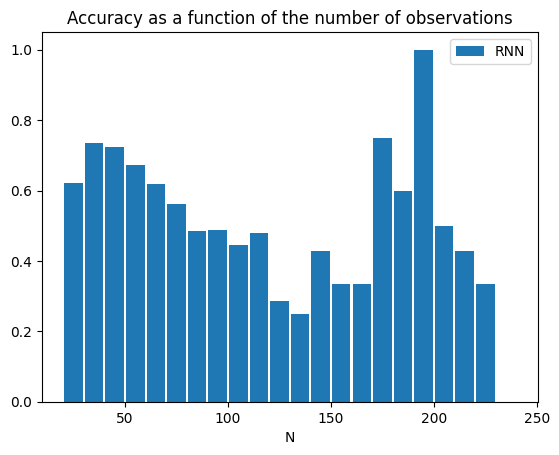

In [77]:
plt.bar(XX, ACC, width=interval-1, label='RNN')
plt.xlabel('N')
plt.legend(loc=0)
plt.title('Accuracy as a function of the number of observations')
plt.plot()